In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best


In [4]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [5]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [6]:
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [7]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [8]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

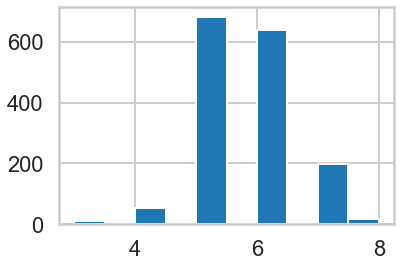

In [9]:
print(df.shape)

plt.hist(df.quality)

In [10]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [11]:
Xnames = list(df.columns.values[1:11])

In [12]:
np.mean(df['target'])

0.1357098186366479

In [13]:
# Create test/train mask
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [14]:
# make sure we didn't get unlucky in our mask selection
print("% Good wines in Training:", np.mean(df.target[mask]))
print("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.145985401459854
% Good wines in Testing: 0.1203125


In [15]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 2} 0.3418535852567944 {'mean_fit_time': array([0.00178032, 0.00121856, 0.00142403, 0.00173035, 0.00161924,
       0.00063539, 0.00076132, 0.00079975, 0.00158577, 0.00108991,
       0.00119696, 0.00120487, 0.00041614, 0.00160689, 0.00100517,
       0.00120544, 0.00279469, 0.00135002, 0.0009995 , 0.00169535,
       0.00176263, 0.00296407, 0.00121632, 0.00160365, 0.0027914 ,
       0.00141592, 0.00198092, 0.00200348, 0.00121646, 0.00198092,
       0.00258589, 0.00340877, 0.00333009, 0.00240493, 0.00120316,
       0.00250902, 0.0011054 , 0.0020082 , 0.00092478, 0.00090623,
       0.00019975, 0.0009994 ]), 'std_fit_time': array([0.00132386, 0.00075812, 0.00089662, 0.00188259, 0.00143691,
       0.00052252, 0.00093419, 0.0015995 , 0.00138942, 0.00188756,
       0.00158768, 0.00160251, 0.00050966, 0.00196805, 0.0015493 ,
       0.00147984, 0.00193076, 0.00186113, 0.00154991, 0.0020818 ,
       0.00174089, 0.0017726 , 0.00161293, 0.00196407,

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


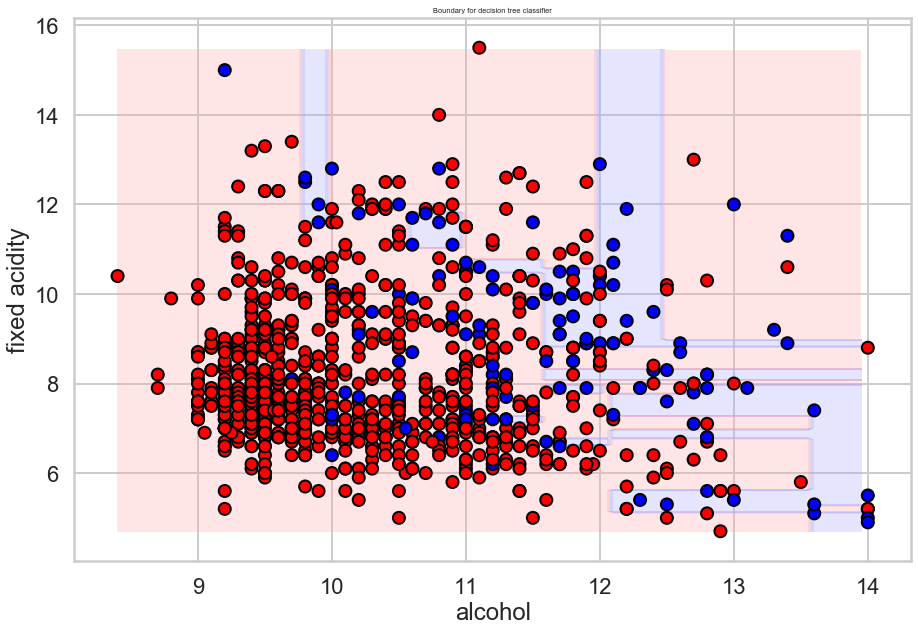

In [16]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

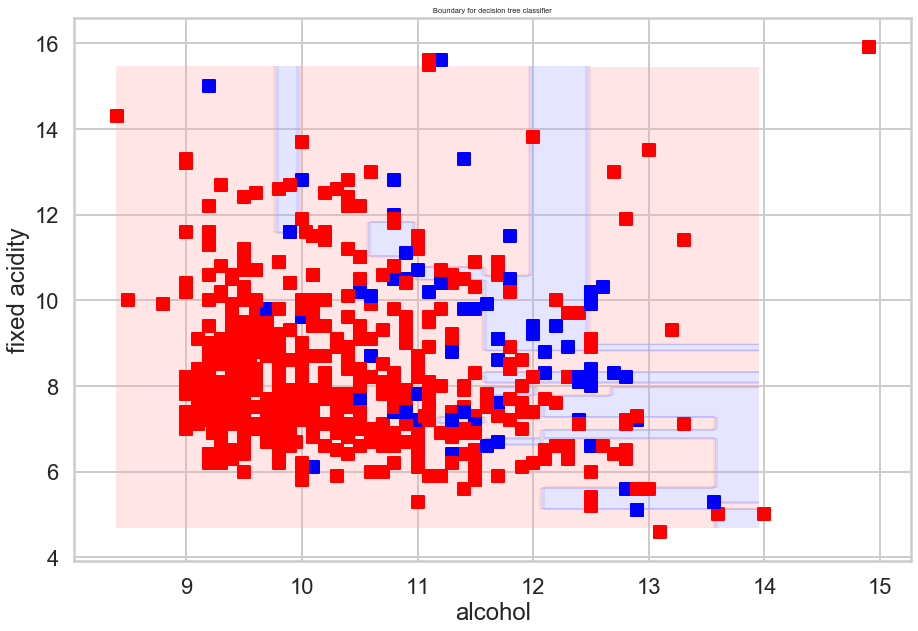

In [17]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.31690391890161385 {'mean_fit_time': array([0.00113592, 0.0014338 , 0.00122542]), 'std_fit_time': array([0.00097009, 0.00182374, 0.00149304]), 'mean_score_time': array([0.00227776, 0.00207858, 0.00191259]), 'std_score_time': array([0.00158651, 0.00175059, 0.00206954]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.3       , 0.17142857, 0.22222222]), 'split1_test_score': array([0.29508197, 0.33766234, 0.30555556]), 'split2_test_score': array([0.34782609, 0.4       , 0.41666667]), 'split3_test_score': array([0.2739

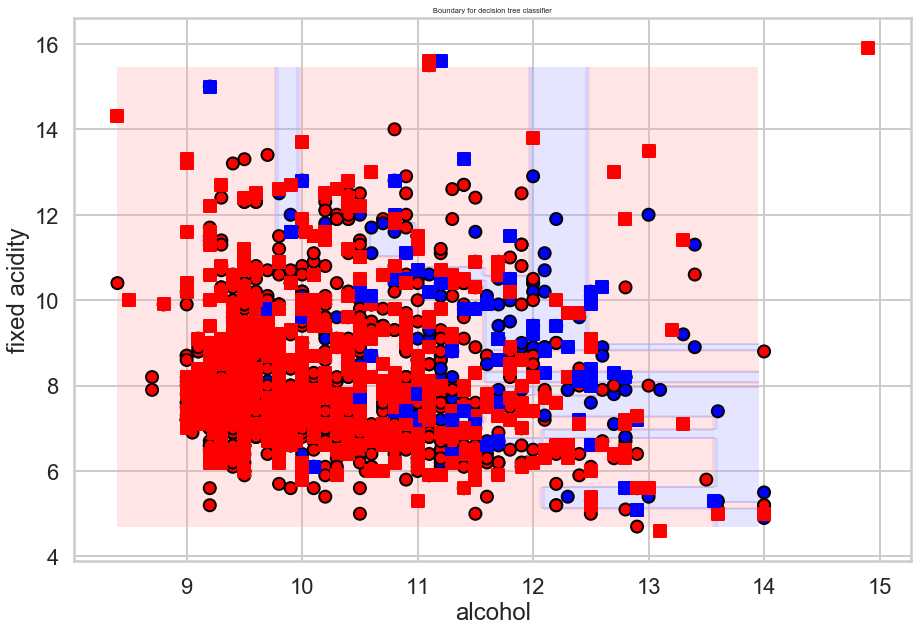

In [18]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [19]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 7} 0.49284737073567486 {'mean_fit_time': array([0.00222497, 0.00277319, 0.00147295, 0.00127525, 0.00301909,
       0.00260005, 0.00292058, 0.00228553, 0.00347457, 0.00246439,
       0.00350232, 0.00313501, 0.00411291, 0.00381393, 0.00372834,
       0.00335617, 0.00304008, 0.00401063, 0.00414133, 0.00410814,
       0.0037478 , 0.00327711, 0.00431514, 0.00483699, 0.00406103,
       0.00285864, 0.00386281, 0.00398598, 0.00406828, 0.00420446,
       0.00522237, 0.00489049, 0.00397944, 0.0043457 , 0.00397935,
       0.00097775, 0.00285635, 0.00504169, 0.00389194, 0.00504723,
       0.00440264, 0.00574765, 0.00419879, 0.00404363, 0.0061811 ,
       0.00706964, 0.00466123, 0.00476737, 0.00419869, 0.00309415,
       0.00401163, 0.00257087, 0.00552073, 0.00589018, 0.00548186,
       0.00573282, 0.00580173, 0.004072  , 0.00403934, 0.00653234,
       0.00755754, 0.00481992, 0.00455046, 0.00462008, 0.00705252,
       0.00495367, 0.00445786, 0.00

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 9} 0.4516303264223821 {'mean_fit_time': array([0.00371761, 0.00830374, 0.01600075, 0.01940713, 0.02267933,
       0.02893696, 0.03074455, 0.03426838, 0.03986878, 0.04689927,
       0.05249996, 0.04620147, 0.05691986, 0.0616869 , 0.06172371,
       0.07194519, 0.06348867, 0.07176762, 0.07719541]), 'std_fit_time': array([0.00130318, 0.00199122, 0.00261353, 0.00237843, 0.00272145,
       0.00226298, 0.00254482, 0.00262092, 0.00263983, 0.00505016,
       0.00688603, 0.00333048, 0.00550097, 0.00732481, 0.0107922 ,
       0.00730599, 0.00173954, 0.00720265, 0.00728875]), 'mean_score_time': array([0.00181322, 0.00152593, 0.00402884, 0.0033978 , 0.00437961,
       0.00276928, 0.00363855, 0.0026814 , 0.00316434, 0.00351186,
       0.00506139, 0.00394306, 0.00419836, 0.00454988, 0.00591397,
       0.00543203, 0.00534883, 0.0058197 , 0.0074677 ]), 'std_score_time': array([0.00224416, 0.00138385, 0.00099721, 0.00143936, 0.0017256 ,
       0.00229005, 0.00199565, 0.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


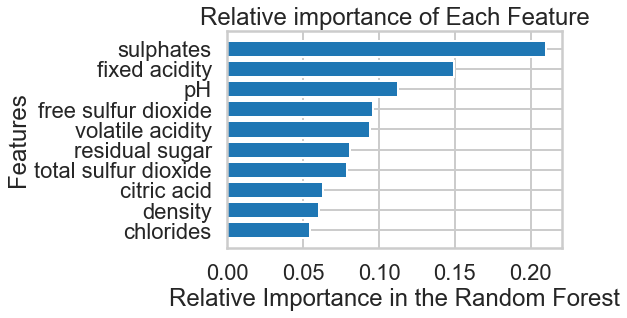

In [21]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 13} 0.5016960868889961 {'mean_fit_time': array([0.05051446, 0.05023475, 0.05311604, 0.05775132, 0.06539364,
       0.06653209, 0.06913862, 0.06417031, 0.06714625, 0.07847834,
       0.0810945 , 0.08433237, 0.09057465, 0.09571271, 0.09899154,
       0.09707794, 0.10067797, 0.11019373, 0.10730357, 0.11314273,
       0.11289444, 0.12117448, 0.12269964, 0.13099446, 0.13054295,
       0.13378468, 0.15414758, 0.1493176 , 0.15669856, 0.15459766,
       0.1609108 , 0.16783066, 0.16069961, 0.17015886, 0.17271266,
       0.1665122 , 0.18040023, 0.18738174, 0.17850876, 0.19911146,
       0.19670739, 0.20886989, 0.20828314, 0.20483017, 0.21074867,
       0.21037478, 0.22461915, 0.22431483, 0.22393737, 0.25513663]), 'std_fit_time': array([0.0052284 , 0.00615976, 0.00612681, 0.00796873, 0.00485734,
       0.00903097, 0.00867782, 0.00084895, 0.00313326, 0.00622987,
       0.01127001, 0.00715023, 0.01036508, 0.01116334, 0.0082138 ,
       0.00720297, 0.00510177, 0.0137

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 4, 'n_estimators': 52} 0.49845208410972286 {'mean_fit_time': array([0.04825692, 0.04828348, 0.0378624 , 0.04173594, 0.04081697,
       0.0354466 , 0.03936467, 0.03941951, 0.04414091, 0.04161186,
       0.0443439 , 0.04377685, 0.04337649, 0.04941993, 0.04277835,
       0.05085173, 0.05051179, 0.04961958, 0.04913154, 0.04687419,
       0.05061045, 0.04634986, 0.05691648, 0.05774703, 0.06516848,
       0.06027064, 0.05753055, 0.06186671, 0.06675358, 0.06919279,
       0.04778624, 0.05051193, 0.04845204, 0.05031667, 0.05104837,
       0.05205259, 0.06171699, 0.0526917 , 0.06995406, 0.05724459,
       0.05715036, 0.06964965, 0.07196512, 0.0656549 , 0.08267603,
       0.07370057, 0.06588163, 0.07455158, 0.07429428, 0.06998916,
       0.07258339, 0.07844005, 0.07591481, 0.08627367, 0.08070498,
       0.08764658, 0.08271279, 0.09695296, 0.09605336, 0.08586445,
       0.06242342, 0.07281618, 0.06775308, 0.07164016, 0.07270479,
       0.07986541, 0.07368817, 0.0758266 , 0.0835

[[533  30]
 [ 37  40]]
########################################################


In [24]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
# your code here
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]


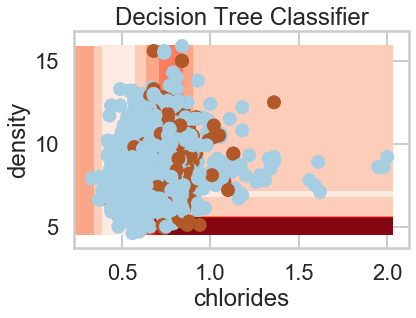

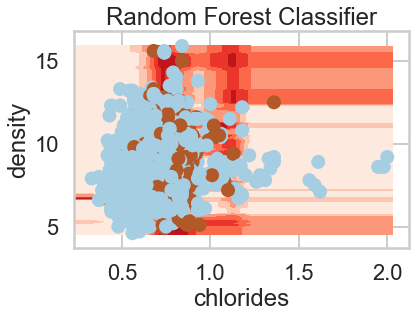

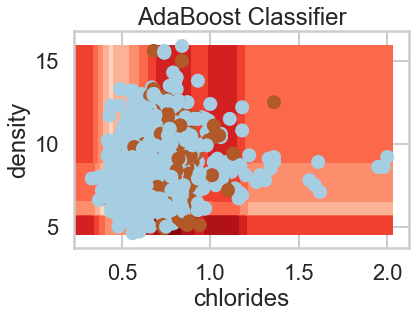

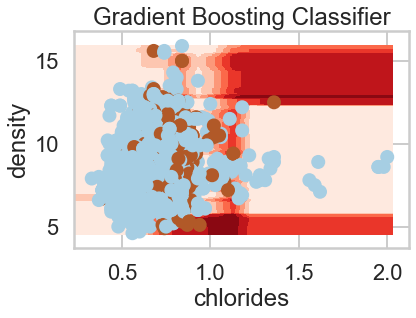

In [25]:
X_imp = df[df.columns[imp_cols]].values
Y = df.target.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(4):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)